In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199
import pandas as pd
import pandas as pd
#Univariate Analysis
#data visualisation
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import warnings; warnings.simplefilter('ignore')

In [106]:
df1 = pd.read_csv('train50k.csv')

In [144]:
result.head()

Unnamed: 0    date  sourceLatitude  sourceLongitude  destinationLatitude  \
0           0  960426       32.692973        51.534325            35.719600   
1           1  960631       39.024777        47.727311            37.794447   
2           2  960521       34.644159        50.875606            36.652243   
3           3  960409       32.621658        51.560335            36.469973   
4           4  960205       37.837692        46.828924            35.697815   

   destinationLongitude  distanceKM  taxiDurationMin  vehicleOption  weight  \
0             50.360540         409              287              0    10.0   
1             48.898530         320              314              0    10.0   
2             51.490208         346              329              3    13.6   
3             52.343745         626              472              6     4.0   
4             51.396750         576              366              5     2.0   

     price  vechType  
0  4860000         2  
1  2700000         2  
2  4000000         0  
3  4500000         1  
4  2700000         1

In [145]:
result['vechType'].value_counts()

0    19578
1    19578
2    19578
3    19578
Name: vechType, dtype: int64

In [142]:
result['vehicleOption'].value_counts()

0    29056
6    11995
2    10138
3     6831
5     5525
4     4138
7     3654
1     3558
8     3417
Name: vehicleOption, dtype: int64

In [110]:
# label encode the target variable
df1.vehicleOption = LabelEncoder().fit_transform(df1.vehicleOption)

In [146]:
result.head()

Unnamed: 0    date  sourceLatitude  sourceLongitude  destinationLatitude  \
0           0  960426       32.692973        51.534325            35.719600   
1           1  960631       39.024777        47.727311            37.794447   
2           2  960521       34.644159        50.875606            36.652243   
3           3  960409       32.621658        51.560335            36.469973   
4           4  960205       37.837692        46.828924            35.697815   

   destinationLongitude  distanceKM  taxiDurationMin  vehicleOption  weight  \
0             50.360540         409              287              0    10.0   
1             48.898530         320              314              0    10.0   
2             51.490208         346              329              3    13.6   
3             52.343745         626              472              6     4.0   
4             51.396750         576              366              5     2.0   

     price  vechType  
0  4860000         2  
1  2700000         2  
2  4000000         0  
3  4500000         1  
4  2700000         1

In [147]:
#Independentand dependent features 
X= result.drop('vehicleOption',axis=1)
y= result.vehicleOption


In [ ]:
X.drop('ID',inplace=True,axis=1)
X.drop('SourceState',inplace=True,axis=1)
X.drop('destinationState',inplace=True,axis=1)

Class=0, n=29056 (11.111%)
Class=3, n=29056 (11.111%)
Class=6, n=29056 (11.111%)
Class=5, n=29056 (11.111%)
Class=2, n=29056 (11.111%)
Class=4, n=29056 (11.111%)
Class=1, n=29056 (11.111%)
Class=8, n=29056 (11.111%)
Class=7, n=29056 (11.111%)


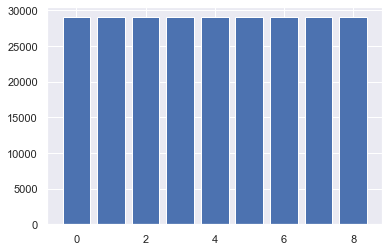

In [153]:
# example of oversampling a multi-class classification dataset
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [4]:
final = pd.read_csv('final_ubber.csv')

In [5]:
final.head()

sourceLatitude  sourceLongitude  destinationLatitude  destinationLongitude  \
0       32.692973        51.534325            35.719600             50.360540   
1       39.024777        47.727311            37.794447             48.898530   
2       34.644159        50.875606            36.652243             51.490208   
3       32.621658        51.560335            36.469973             52.343745   
4       37.837692        46.828924            35.697815             51.396750   

   distanceKM  taxiDurationMin  weight    price  vechType  vechOption  
0         409              287    10.0  4860000         2           0  
1         320              314    10.0  2700000         2           0  
2         346              329    13.6  4000000         0           3  
3         626              472     4.0  4500000         1           6  
4         576              366     2.0  2700000         1           5

In [6]:
y = final['price']

In [7]:
import numpy as np
y1=np.sqrt(y)

In [8]:
# base line model
X = final.drop(['price'],axis=1)
y=y1
X.shape
y.shape

(261504,)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [11]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [12]:
# Creating instance of Linear Regresssion
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae
lr = LR()

# Fitting the model
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(X_train)
k = mae(train_predict, y_train)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 302.9450806344635


In [17]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(X_test)
k = mae(test_predict, y_test)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     300.85749959107494


In [18]:
# RMSE
import numpy as np
np.sqrt(mean_squared_error(y_test,test_predict))

400.41244264344556

In [19]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test_predict, y_test)

0.13122524744920935

In [21]:
print("Linear Regression",lr.score(X_train, y_train))

Linear Regression 0.8144565074797218


In [22]:
print("Linear Regression",lr.score(X_test, y_test))

Linear Regression 0.8133769917236386


In [27]:
from sklearn import datasets, ensemble
reg = ensemble.GradientBoostingRegressor()
reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [28]:
# Predicting over the Train Set and calculating error
train_predict12 = reg.predict(X_train)
k111 = mae(train_predict12, y_train)
print('Training Mean Absolute Error', k111)


Training Mean Absolute Error 244.85447381027794


In [30]:
# Predicting over the Test Set and calculating error
test_predict13 = reg.predict(X_test)
k122 = mae(test_predict13, y_test)
print('Test Mean Absolute Error    ', k122 )

Test Mean Absolute Error     242.6345003990428


In [31]:
print("XG Boost",reg.score(X_train, y_train))

XG Boost 0.8755215889210922


In [32]:
print("XG Boost",reg.score(X_test, y_test))

XG Boost 0.8749563065002289
